<a href="https://colab.research.google.com/github/Andrade1123/Qualidade-de-Software-Seguran-a-e-Sistemas-Inteligentes/blob/main/Rodrigo_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Engenharia de Sistemas de Software Inteligentes - Profs. Marcos Kalinowski e Tatiana Escovedo
## Prática de Machine Learning em Python

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

## 1. Definição do Problema


Este conjunto de dados contém informações sobre o desempenho de alunos do ensino médio em matemática, incluindo notas e informações demográficas. Os dados foram coletados em três escolas de ensino médio nos Estados Unidos.

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics


**Informações sobre os atributos:**
1. **Gender** - O gênero do aluno (masculino/feminino)
2. **Race/ethnicity** - Origem racial ou étnica do aluno (asiático, afro-americano, hispânico, etc...)
3. **Parental level of education** - O mais alto nível de escolaridade alcançado pelos pais ou responsáveis ​​do aluno
4. **Lunch** - Se o aluno recebe almoço grátis ou com preço reduzido (sim/não)
5. **Test preparation course** - Se o aluno concluiu um curso de preparação para testes (sim/não)
6. **Math score** - A pontuação do aluno em um teste padronizado de matemática
7. **Reading score** - a pontuação do aluno em um teste de leitura padronizado
8. **Writing score** - a pontuação do aluno em um teste de redação padronizado

## 2 - Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/brunogomesweb/arquivos/main/exams.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,bachelor's degree,standard,none,98,84,83
1,male,group C,associate's degree,standard,completed,50,52,52
2,male,group C,associate's degree,standard,completed,99,100,97
3,male,group C,high school,standard,none,66,62,52
4,female,group D,some high school,free/reduced,completed,55,81,76


## 3 - Analisando os dados e fazendo o pré-processamento

In [3]:
#analisando os tipos dos dados
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


None

In [4]:
#verificando as estatísticas dos dados
display(dataset.describe())

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.727000,69.389000,68.216000
std,15.050481,14.496614,15.299458
min,21.000000,25.000000,20.000000
25%,56.000000,59.000000,57.000000
50%,67.000000,70.000000,68.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
#verificando se existem registros nulos
display(dataset.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

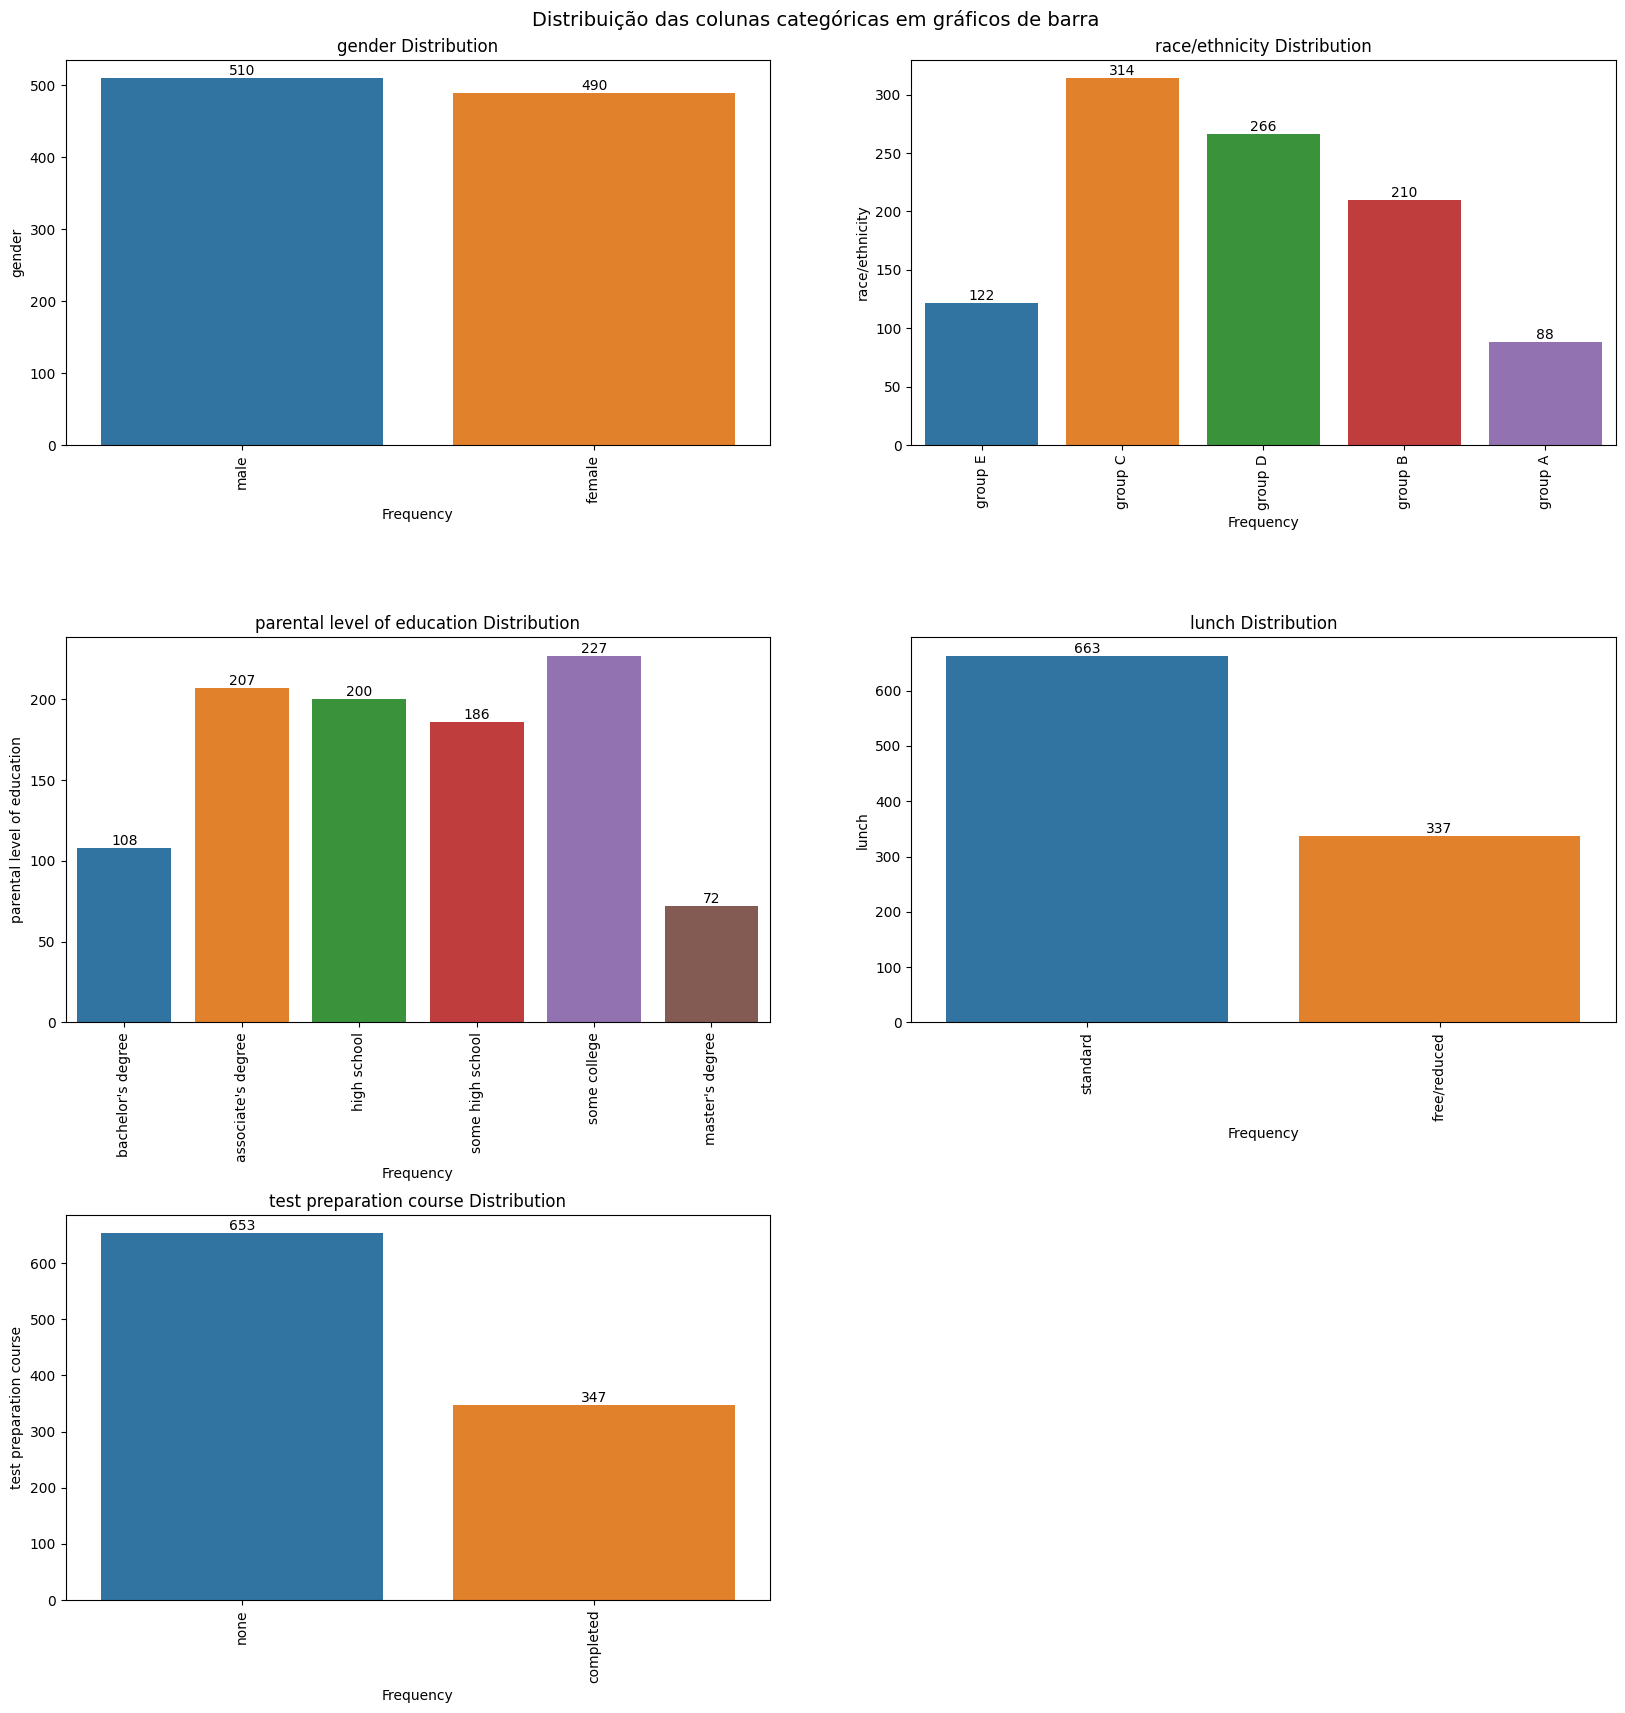

In [6]:
#plotando os dados para melhor visualização
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    sns.countplot(x=col, data=dataset, ax=axes[r, c])
    for container in axes[r, c].containers:
        axes[r, c].bar_label(container, label_type="edge")
    axes[r, c].set_ylabel(f"{col}")
    axes[r, c].set_xlabel("Frequency")
    axes[r, c].set_xticklabels(axes[r,c].get_xticklabels(),rotation="vertical")
    axes[r, c].set_title(f"{cat_cols[i]} Distribution")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5)
fig.text(0.5,0.9,"Distribuição das colunas categóricas em gráficos de barra", va="center", ha="center", fontsize=14)
plt.show()

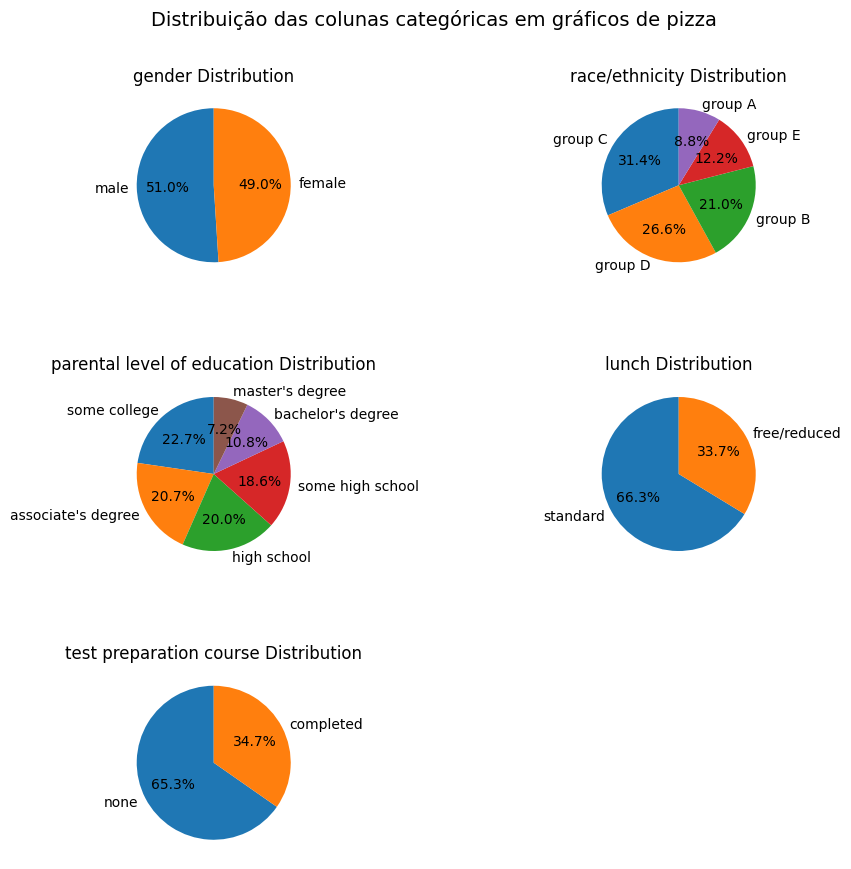

In [7]:
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    counts = dataset[col].value_counts()
    axes[r, c].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[r, c].set_title(f"{col} Distribution")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
fig.text(0.5,0.95,"Distribuição das colunas categóricas em gráficos de pizza",va="center", ha="center", fontsize=14)
plt.show()

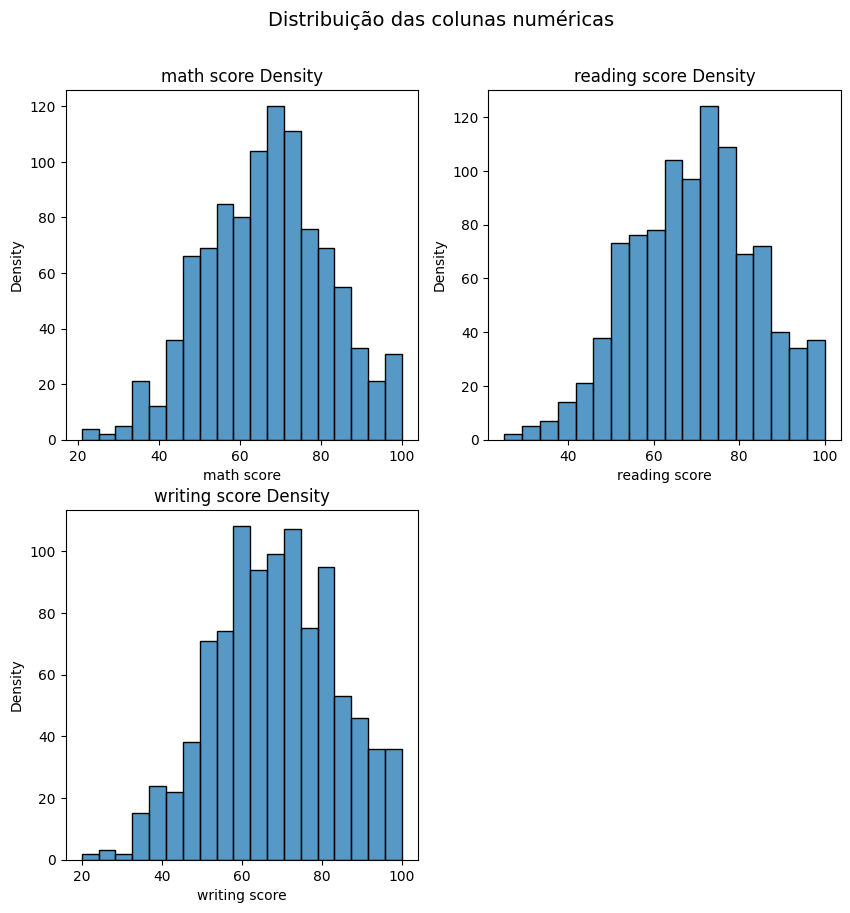

In [8]:
num_cols=["math score","reading score","writing score"]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, col in enumerate(num_cols):
    r,c=i//2,i%2
    sns.histplot(x=col, data=dataset,ax=axes[r,c])
    axes[i//2,i%2].set_ylabel("Density")
    axes[i//2,i%2].set_title(f"{col} Density")
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
fig.text(0.5,0.95,"Distribuição das colunas numéricas",va="center", ha="center", fontsize=14)
plt.show()

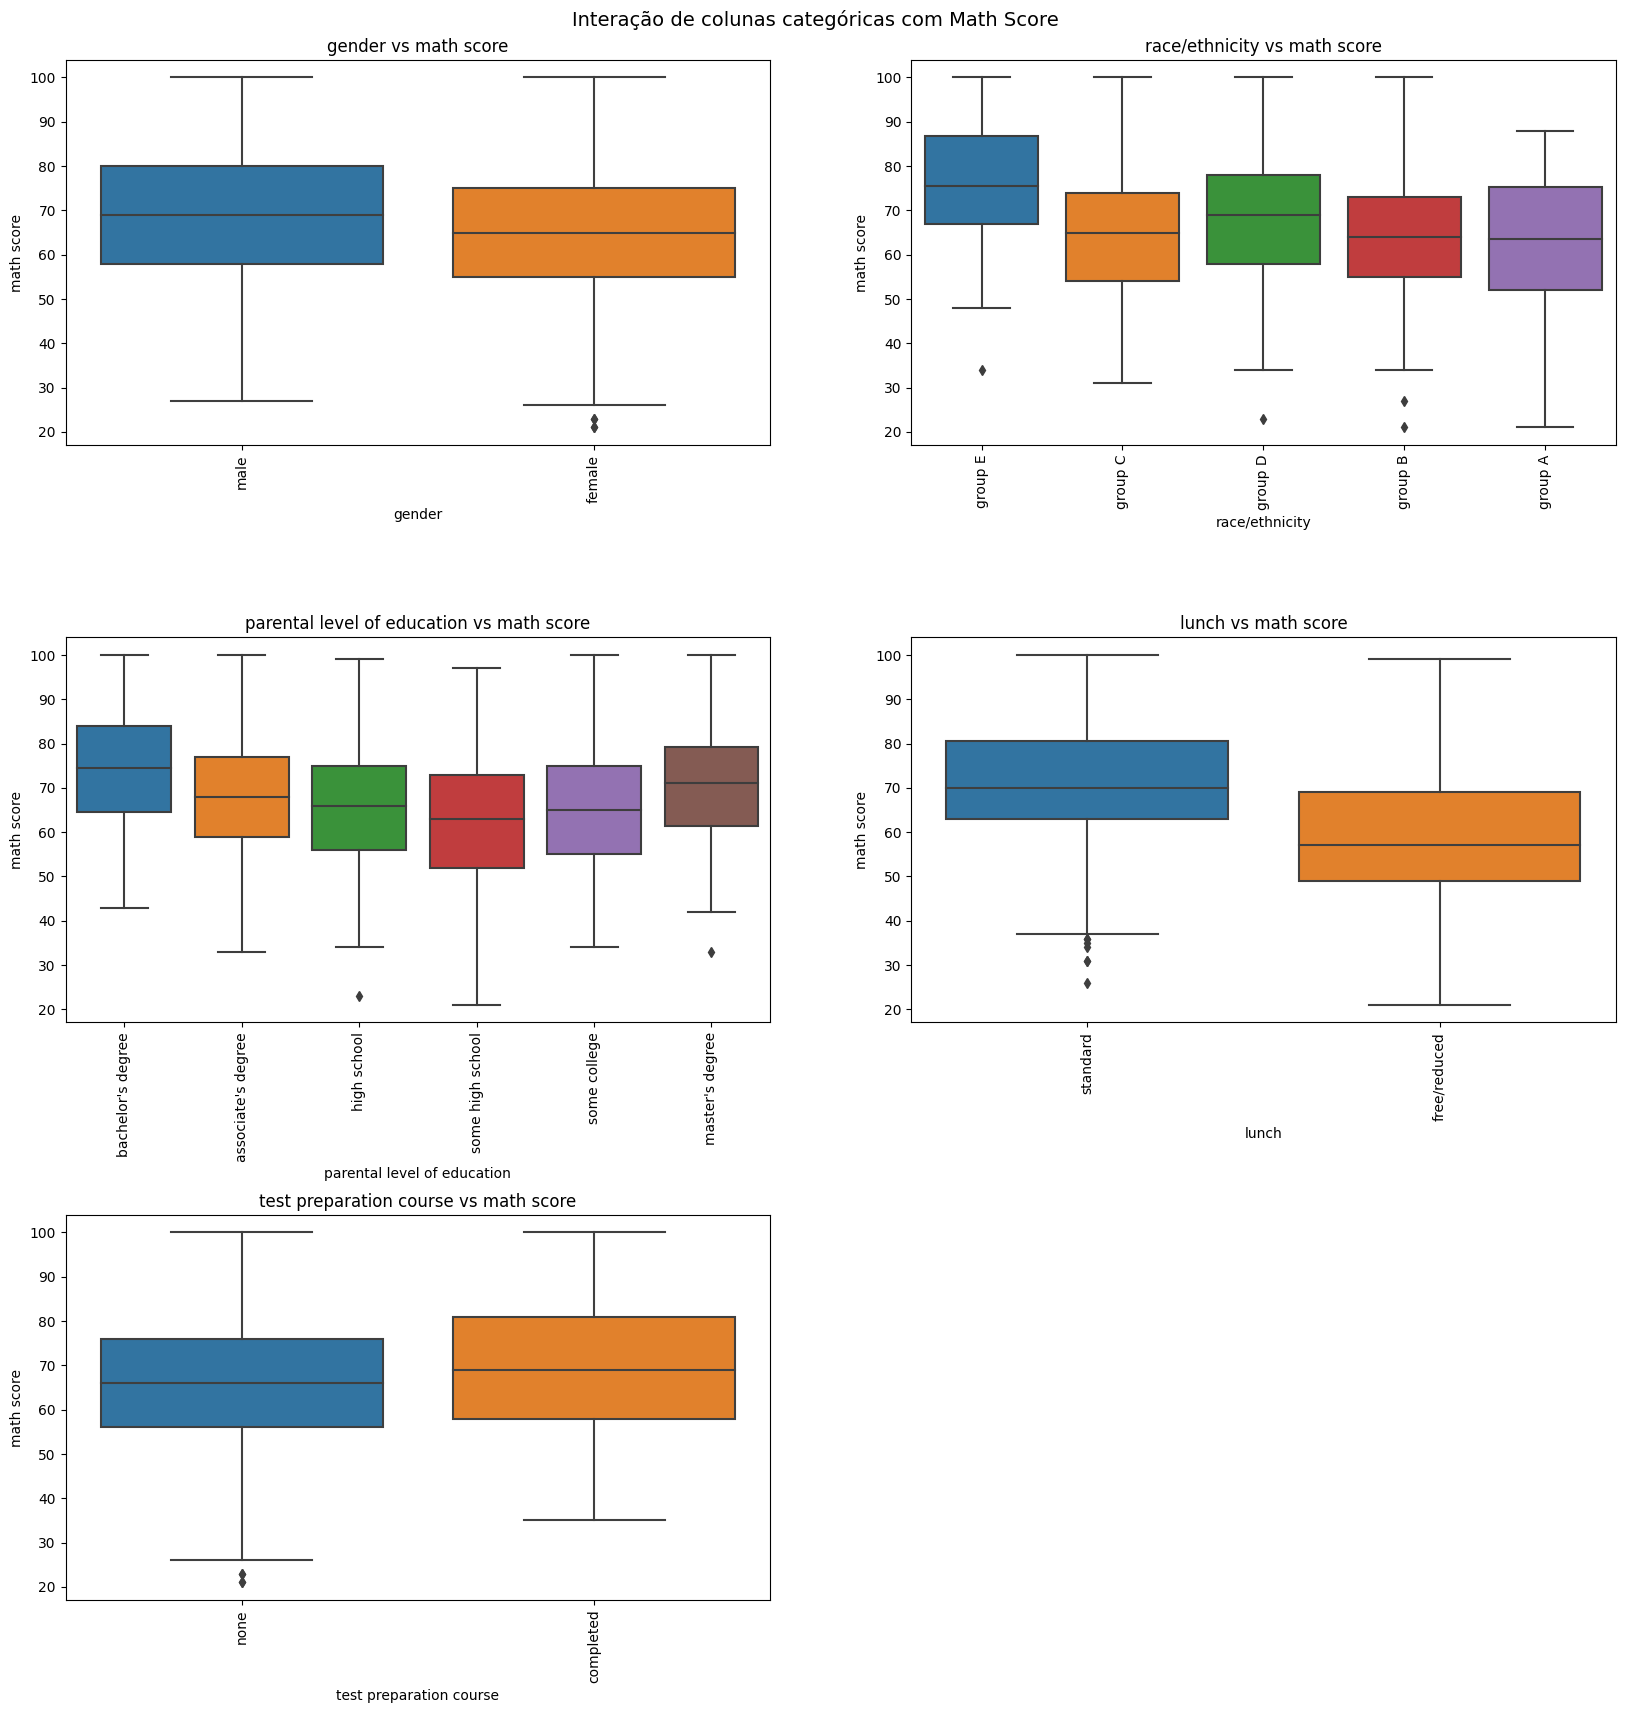

In [9]:
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
for i, col in enumerate(cat_cols):
    r = i // 2
    c = i % 2
    sns.boxplot(x=col,y="math score", data=dataset, ax=axes[r, c])
    for container in axes[r, c].containers:
        axes[r, c].bar_label(container, label_type="edge")
    axes[r, c].set_xlabel(f"{col}")
    axes[r, c].set_ylabel("math score")
    axes[r, c].set_xticklabels(axes[r,c].get_xticklabels(),rotation="vertical")
    axes[r, c].set_title(f"{cat_cols[i]} vs math score")
if len(cat_cols) % 2 != 0:
    fig.delaxes(axes[-1, -1])
plt.subplots_adjust(hspace=0.5)
fig.text(0.5,0.9,"Interação de colunas categóricas com Math Score", va="center", ha="center", fontsize=14)
plt.show()

In [10]:
#Executando o Label Encoder nas colunas categóricas
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
label_encoders={}
for col in cat_cols:
    le=LabelEncoder()
    dataset[col]=le.fit_transform(dataset[col])
    label_encoders[col]=le
display(dataset.head())
for column, encoder in label_encoders.items():
    print(f"{column} Label Encoder Classes: {encoder.classes_}")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,4,1,1,1,98,84,83
1,1,2,0,1,0,50,52,52
2,1,2,0,1,0,99,100,97
3,1,2,2,1,1,66,62,52
4,0,3,5,0,0,55,81,76


gender Label Encoder Classes: ['female' 'male']
race/ethnicity Label Encoder Classes: ['group A' 'group B' 'group C' 'group D' 'group E']
parental level of education Label Encoder Classes: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
lunch Label Encoder Classes: ['free/reduced' 'standard']
test preparation course Label Encoder Classes: ['completed' 'none']


## 4 - Separação em conjunto de treino e conjunto de teste com holdout

In [11]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:7]
y = array[:,5]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## 5 - Modelagem e Inferência

### Criação e avaliação de modelos: linha base


KNN: 0.287500 (0.030104)
CART: 0.987500 (0.012500)
NB: 0.970000 (0.010000)
SVM: 0.046250 (0.009763)


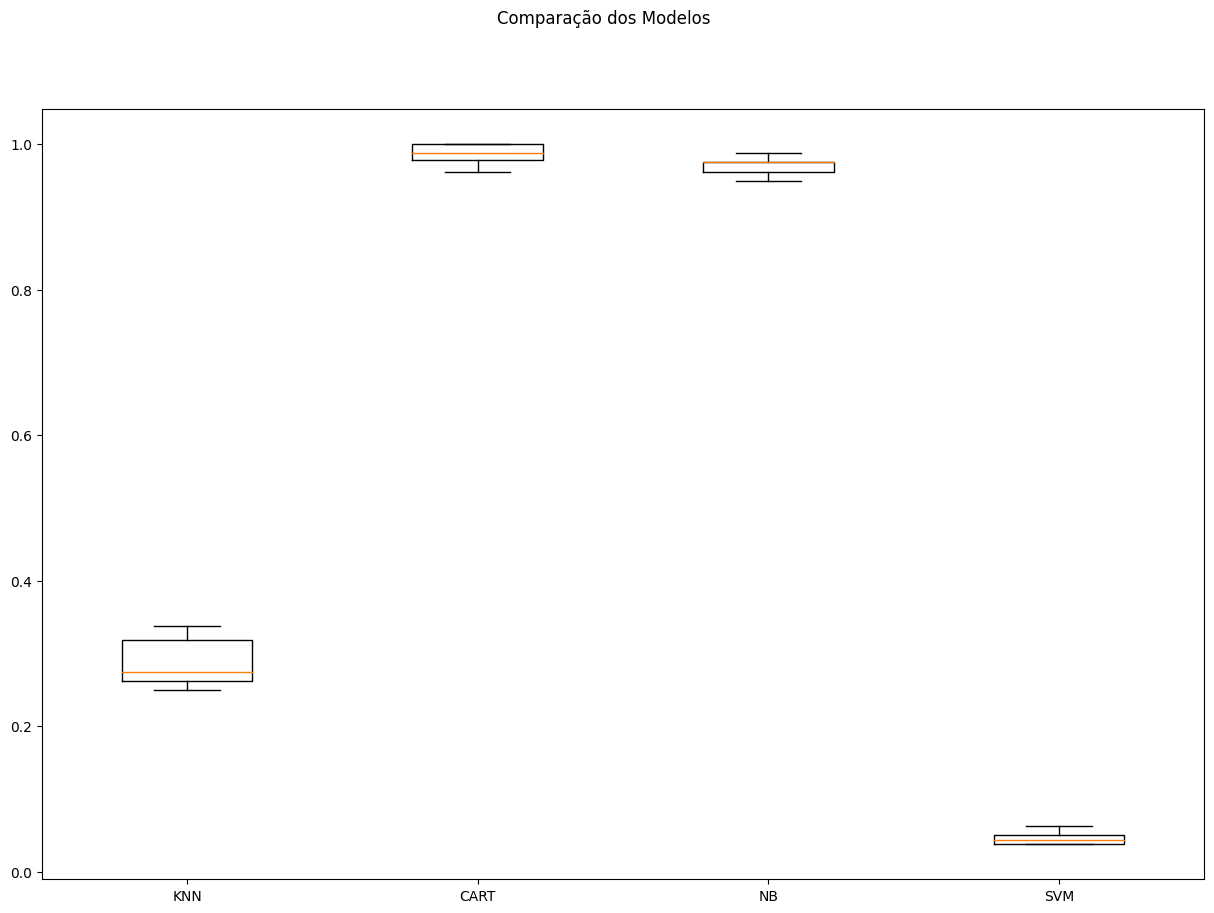

In [12]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.287 (0.030)
CART-orig: 0.988 (0.013)
NB-orig: 0.970 (0.010)
SVM-orig: 0.046 (0.010)
KNN-padr: 0.059 (0.019)
CART-padr: 0.979 (0.014)
NB-padr: 0.938 (0.022)
SVM-padr: 0.080 (0.019)
KNN-norm: 0.049 (0.019)
CART-norm: 0.985 (0.013)
NB-norm: 0.936 (0.021)
SVM-norm: 0.039 (0.012)


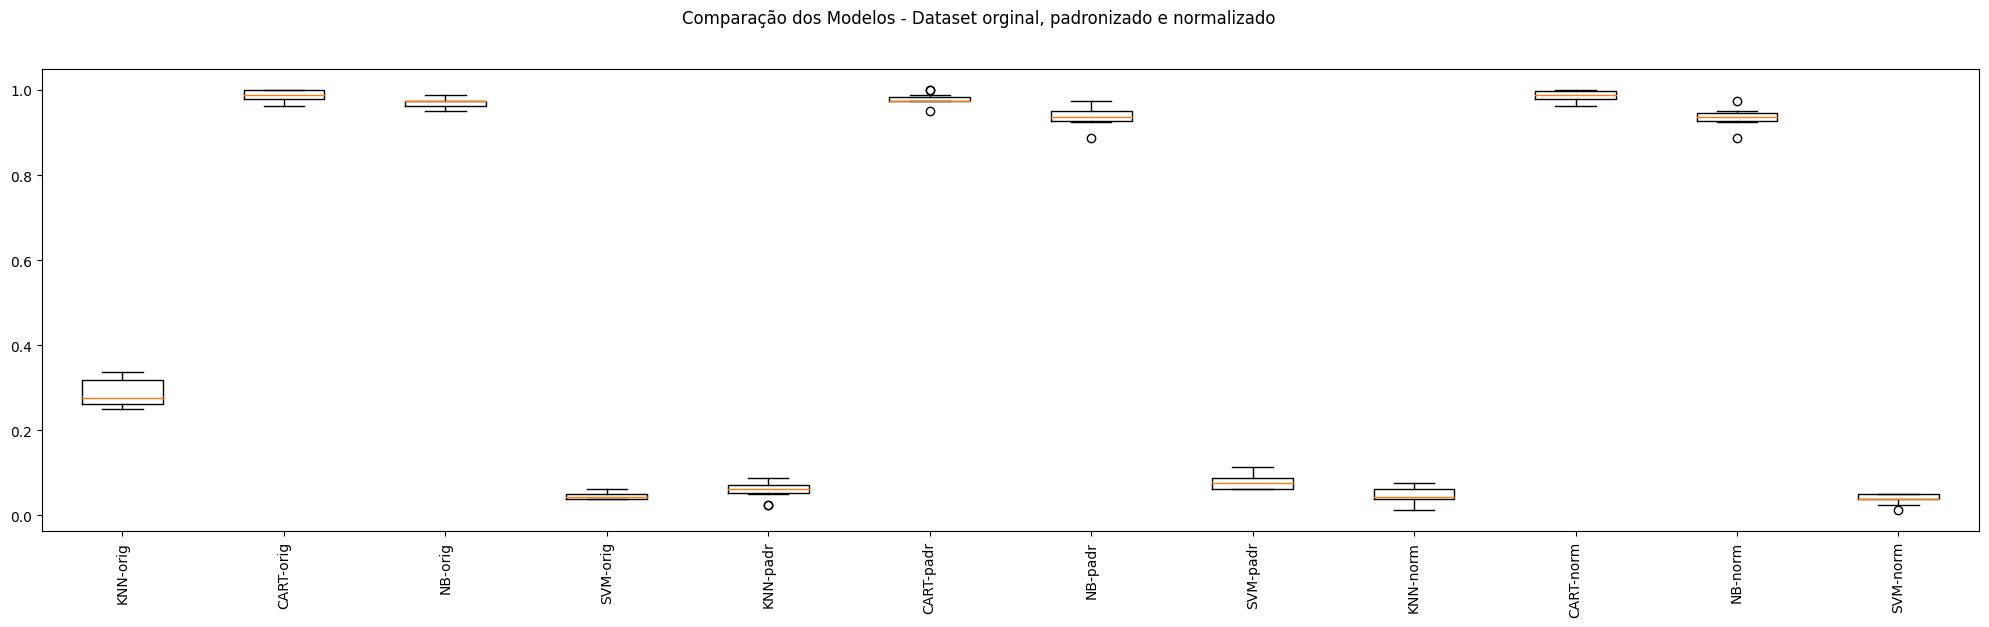

In [13]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [14]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.475000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.103750 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.090000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}


## 6 - Finalização do Modelo

In [15]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=17)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.075


In [16]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=17)

## 7 - Simulando a aplicação do modelo em dados não vistos

In [17]:
# Novos dados - não sabemos a classe!

data = {'gender':  [1, 0, 1],
        'race/ethnicity': [0, 1, 3],
        'parental level of education': [5, 3, 1],
        'lunch': [0, 1, 1],
        'test preparation course': [0, 1, 0],
        'reading score': [30, 60, 90],
        'writing score': [60, 30, 10]
        }

atributos = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']
entrada = pd.DataFrame(data, columns=atributos)


array_entrada = entrada.values
#array_entrada
X_entrada = array_entrada[:,0:7].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 0.98019606 -1.8624243   1.34736114 -1.40262577 -1.37180333 -2.44147523
  -0.64799254]
 [-1.02020406 -0.9855767   0.24206078  0.71294854  0.72896747 -0.4471861
  -2.71847674]
 [ 0.98019606  0.7681185  -0.86323958  0.71294854 -1.37180333  1.54710303
  -4.09879955]]


In [18]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[44 60 76]
